In [271]:
from 传统动量指标集 import *
from 传统波动率指标集 import *
from 国泰君安指标计算集 import *
from 世宽指标计算集 import *

import pandas as pd

from tqdm.contrib.concurrent import process_map
from multiprocessing import Pool, cpu_count
from functools import partial
import 回测函数包
import 计算函数包
import importlib
importlib.reload(回测函数包)
importlib.reload(计算函数包)
from 回测函数包 import *
import 计算函数包 as cf

In [272]:
# 首先计算因子


if __name__ == "__main__":
    feature_compute_funcs = [
        high_low_5days, high_low_17days,

        volume_std_2days, volume_std_11days, volume_std_21days,

        returns_std_3days, returns_std_27days, returns_last_5days, returns_last_18day, returns_last_2days,

        weighted_avg_return_2, weighted_avg_return_42,

        returns_daliy_max_2days, returns_daliy_max_7days, returns_daliy_max_last_20days,

        sma_weight_con_23_37, sma_weight_con_3_62,

        flipping_weight_29_69, flipping_weight_4_67,

        gj_001, gj_002, gj_003, gj_004, gj_005, gj_006, gj_007, gj_008, gj_009, gj_010,
        gj_011, gj_012, gj_013, gj_014, gj_015, gj_016, gj_017, gj_018, gj_019, gj_020,
        gj_021, gj_022, gj_023, gj_024, gj_025, gj_026, gj_027, gj_028, gj_029, gj_031,
        gj_032, gj_033, gj_034, gj_035, gj_036, gj_037, gj_038, gj_039, gj_040, gj_041,
        gj_042, gj_043, gj_044, gj_045, gj_046, gj_047, gj_048, gj_049, gj_050, gj_051,
        gj_052, gj_053, gj_054, gj_056, gj_057, gj_058, gj_059, gj_060, gj_061, gj_062,
        gj_063, gj_064, gj_065, gj_066,

        wq_001, wq_002, wq_003, wq_004, wq_005, wq_006, wq_007, wq_008, wq_009, wq_010,
        wq_011, wq_012, wq_013, wq_014, wq_015, wq_016, wq_017, wq_018, wq_019, wq_020,
        wq_021, wq_022, wq_023, wq_024, wq_025, wq_026, wq_027, wq_028, wq_029, wq_030,
        wq_031, wq_032, wq_033, wq_034, wq_035, wq_036, wq_037, wq_038, wq_039, wq_040,
        wq_041, wq_042, wq_043, wq_044, wq_045, wq_046, wq_047, wq_049, wq_050, wq_051,
        wq_052, wq_053, wq_054, wq_055, wq_057, wq_065, wq_064, wq_060, wq_061, wq_066,
        wq_068, wq_070, wq_071, wq_072, wq_073, wq_074, wq_075, wq_077, wq_078, wq_081,
        wq_083, wq_085
    ]
    # 读取因子名
    feature_names = [func.__name__ for func in feature_compute_funcs]
    df = pd.read_csv("/Users/wangyanbo/24Spring/intern/MLBasedFuturesStrategy/Dataset/指标已计算/dataset.csv")
    df['date'] = pd.to_datetime(df['date'])
    df = df.loc[df['huanyue'] != 1]
    df = df.loc[df['date'].dt.dayofweek != 4]
    print("已删除所有周五和所有换月日")

    # TODO 修改初筛因子的方法
    ic = cf.information_coefficient(df, feature_list=feature_names)
    features = cf.factor_filter_double(df, ic, number_bar=0.1, top_n=15, ic_bar=0.07125)

    print(features)
    print("指标筛选已完成")

已删除所有周五和所有换月日
{'A': [], 'AG': ['gj_014', 'gj_019', 'returns_last_5days', 'gj_018', 'gj_066', 'gj_065', 'gj_026', 'gj_017', 'gj_046', 'gj_011', 'gj_063', 'gj_003', 'gj_022', 'gj_029', 'gj_047'], 'AL': ['gj_037', 'wq_005', 'wq_070', 'gj_012', 'wq_008'], 'AP': ['wq_025', 'wq_010', 'wq_018', 'wq_033', 'gj_054', 'wq_009', 'flipping_weight_4_67', 'gj_060', 'gj_010', 'flipping_weight_29_69', 'wq_028', 'weighted_avg_return_42', 'wq_035'], 'AU': ['gj_043', 'gj_022', 'returns_last_5days', 'gj_018', 'gj_019', 'gj_014'], 'BC': ['wq_025', 'wq_018', 'wq_010', 'wq_083', 'gj_054', 'wq_017', 'wq_054', 'wq_011', 'wq_009', 'gj_007', 'gj_002', 'wq_028', 'wq_033', 'wq_047', 'wq_066'], 'BU': ['gj_020', 'returns_last_5days', 'gj_018', 'gj_019', 'gj_017', 'gj_011', 'gj_014'], 'C': ['wq_044'], 'CF': ['returns_last_2days', 'returns_daliy_max_2days', 'gj_043', 'weighted_avg_return_2', 'gj_013', 'wq_041'], 'CJ': ['wq_065', 'weighted_avg_return_2', 'gj_046', 'returns_last_2days', 'gj_026', 'gj_027', 'wq_042', 'gj_

In [273]:
# 对于给定name的期货进行训练
diction_model = []
# TODO: 如何用上第一步初筛的结果
# selected_features = feature_names

name = 'J'
results = []
# selected_features = features[name]
selected_features = feature_names
columns_to_extract = ['date'] + ['id'] + selected_features + ['returns']
df_subset = df[df['id'] == name][columns_to_extract]

# 删除缺失值
df_subset = df_subset.dropna(thresh=int(len(df_subset)*0.9), axis=1)
df_subset = df_subset.dropna()
df_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
df_subset.fillna(method='ffill', inplace=True)
df_subset['prediction'] = 0
df_subset['prediction'] = df_subset['prediction'].astype(float)

# 将数据前99%取出
threshold = int(0.99 * len(df_subset))
if threshold <= 287:
    # 如果某品种过往数据太少，这个品种将不参与运算
    print("当前品种交易数据太少")
else:
    df_subset['label'] = np.where(df_subset.index.isin(df_subset.index[:287]), -1, 1)
    diction_model.append(df_subset)

# results.append(cf.linear_regression_rolling(df_subset, length=287))


sum_length = sum(len(item) for item in diction_model)
print("元素总数是:", sum_length)

元素总数是: 1548


In [274]:
partial_function = partial(cf.linear_regression_rolling, length=287)
results = process_map(partial_function, diction_model, max_workers=cpu_count()-1)
prediction = pd.concat(results, ignore_index=True)

  0%|          | 0/1 [00:00<?, ?it/s]

In [275]:
# partial_function = partial(cf.rolling_rnn, length = 287)
partial_function_lasso = partial(cf.lasso_regression_rolling, length = 287)
results_lasso = process_map(partial_function_lasso, diction_model)
prediction_lasso = pd.concat(results_lasso, ignore_index = True)


# print(prediction)
print('滚动训练已结束,即将开始回测')

  0%|          | 0/1 [00:00<?, ?it/s]

滚动训练已结束,即将开始回测


In [276]:
print(prediction['prediction'])
print(prediction['prediction'].mean())
print(prediction['prediction'].median())
print(prediction['prediction'].var())
print(sum(prediction['prediction']))
print(sum(abs(prediction['prediction'])))
print(len(prediction['prediction']))
print(sum(abs(prediction['prediction'])) / len(prediction['prediction']))

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1543    0.001088
1544    0.002410
1545   -0.004355
1546    0.001950
1547    0.000901
Name: prediction, Length: 1548, dtype: float64
0.0009200744464056315
0.00040623591266964436
1.4390067354653358e-05
1.4242752430359196
3.9388333620502793
1548
0.002544465996156511


In [277]:

data_path = r"/Users/wangyanbo/24Spring/intern/MLBasedFuturesStrategy/Dataset/未连续化/标记了换月日的未连续化的日级数据.csv"
data = pd.read_csv(data_path)

data['date'] = pd.to_datetime(data['date'])
data = data.loc[data['id'] == name]
result = data.merge(prediction[['id', 'date', 'label', 'prediction']], on=['id', 'date'], how='left')

result_lasso = data.merge(prediction_lasso[['id', 'date', 'label', 'prediction']], on=['id', 'date'], how='left')


In [278]:
bar = 0.002
# non_na_count = result['prediction'].notna().sum()
# print(non_na_count)
result = result.dropna(subset=['prediction'])
signals = cf.signals_day(result, bar)

result_lasso = result.dropna(subset = ['prediction'])
signals_lasso = cf.signals_day(result_lasso, bar)

    Asset  Open_Time  Open_Price  Direction Close_Time  Close_Price  \
0       J 2017-02-15      1681.0       -1.0 2017-02-15       1655.5   
1       J 2017-02-16      1654.5       -1.0 2017-02-16       1650.5   
2       J 2017-02-20      1700.0        1.0 2017-02-20       1759.0   
3       J 2017-02-21      1755.0       -1.0 2017-02-21       1736.0   
4       J 2017-02-22      1739.5       -1.0 2017-02-22       1666.5   
..    ...        ...         ...        ...        ...          ...   
723     J 2023-09-20      2509.5        1.0 2023-09-20       2550.0   
724     J 2023-09-21      2552.0        1.0 2023-09-21       2470.5   
725     J 2023-09-25      2507.0        1.0 2023-09-25       2472.0   
726     J 2023-09-28      2396.0        1.0 2023-09-28       2539.5   
727     J 2023-10-09      2540.0       -1.0 2023-10-09       2499.5   

     Predicted_Return  Position  
0           -0.010909   33620.0  
1           -0.008444   33090.0  
2            0.004456   34000.0  
3          

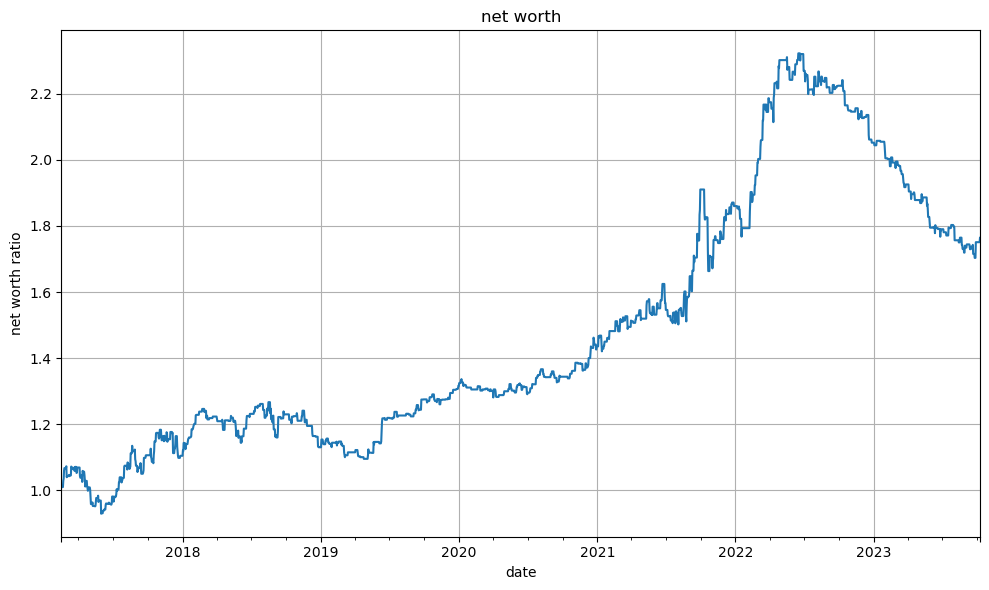

最大回撤开始日期: 2022-06-16 00:00:00
最大回撤结束日期: 2023-09-25 00:00:00
交易次数: 728, 胜率: 53.16%, 日胜率: 53.16%, 盈亏比: 1.028, 日盈亏比: 1.028, 单笔平均盈亏: 314.921, 最大回撤: 0.267, 总收益率: 76.42%, 年化收益率: 8.92%, 夏普比率: 0.632, 卡玛比率: 0.335, 百次交易盈亏0.07791916428533008


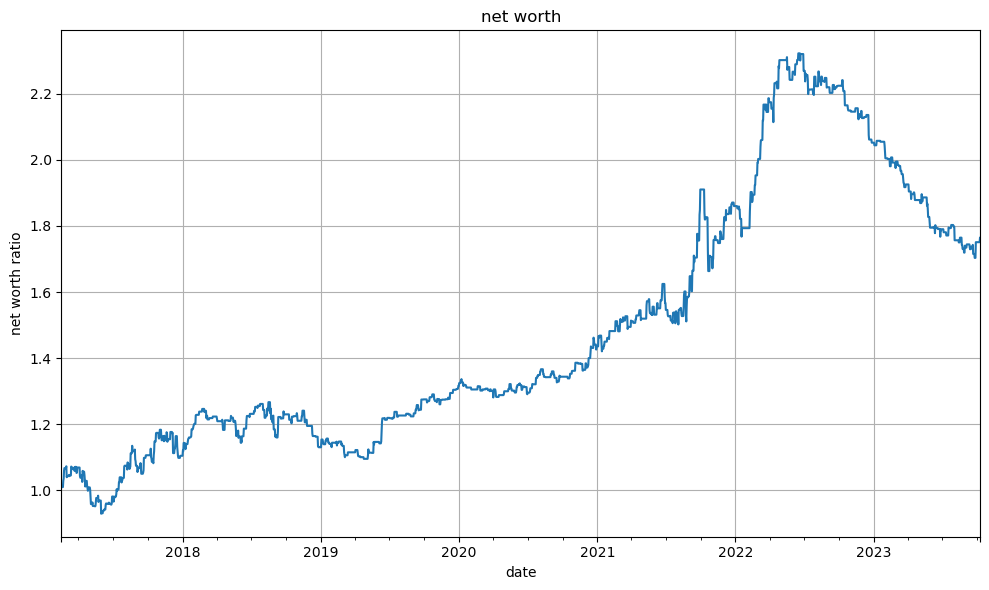

最大回撤开始日期: 2022-06-16 00:00:00
最大回撤结束日期: 2023-09-25 00:00:00
交易次数: 728, 胜率: 53.16%, 日胜率: 53.16%, 盈亏比: 1.028, 日盈亏比: 1.028, 单笔平均盈亏: 314.921, 最大回撤: 0.267, 总收益率: 76.42%, 年化收益率: 8.92%, 夏普比率: 0.632, 卡玛比率: 0.335, 百次交易盈亏0.07791916428533008


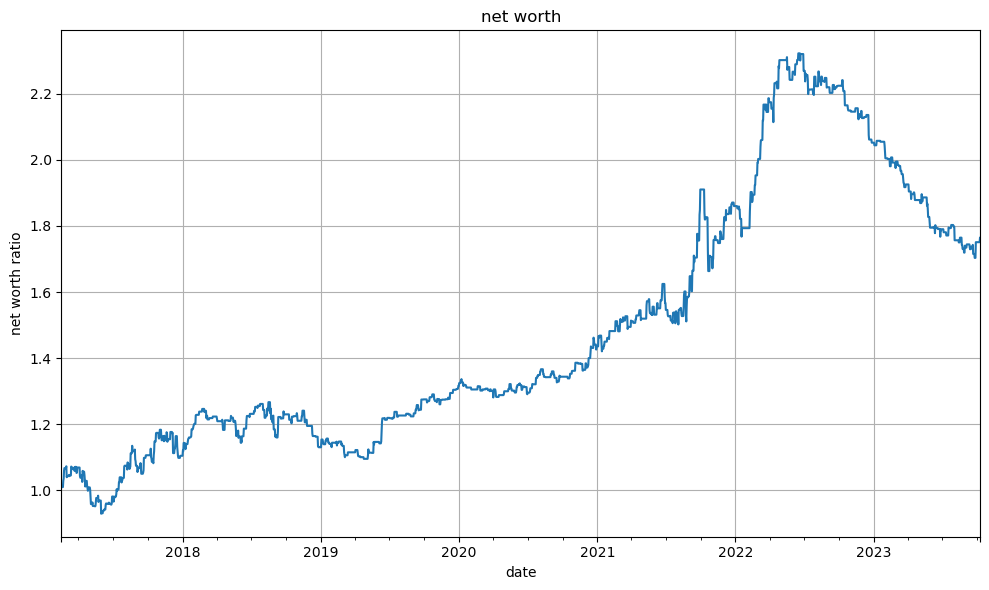

最大回撤开始日期: 2022-06-16 00:00:00
最大回撤结束日期: 2023-09-25 00:00:00
交易次数: 728, 胜率: 53.16%, 日胜率: 53.16%, 盈亏比: 1.028, 日盈亏比: 1.028, 单笔平均盈亏: 314.921, 最大回撤: 0.267, 总收益率: 76.42%, 年化收益率: 8.92%, 夏普比率: 0.632, 卡玛比率: 0.335, 百次交易盈亏0.07791916428533008


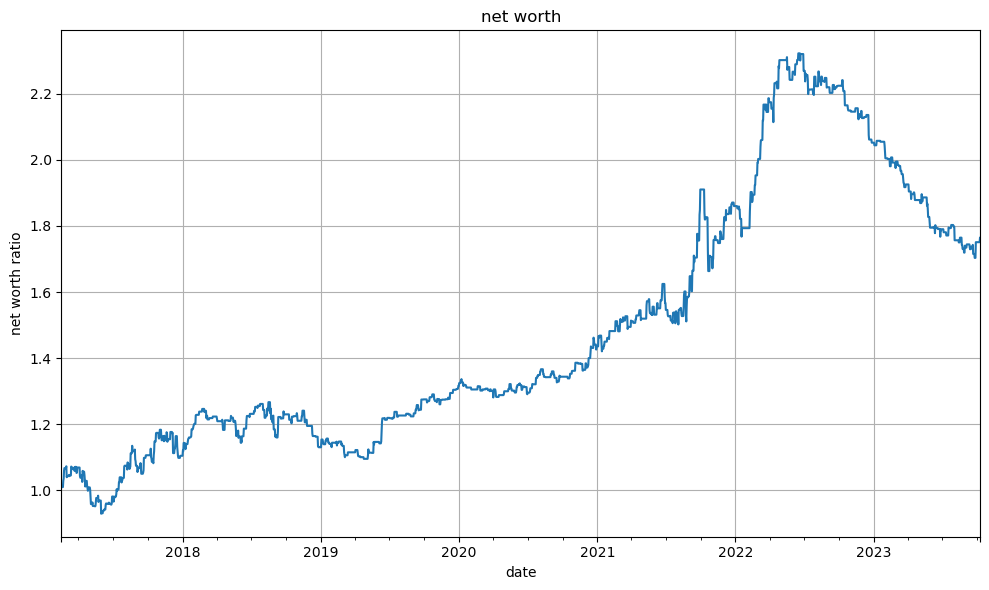

({'交易次数': 728,
  '胜率': 0.5315934065934066,
  '日胜率': 0.5315934065934066,
  '盈亏比': 1.027713570025117,
  '日盈亏比': 1.027713570025117,
  '单笔平均盈亏': 314.9214835164836,
  '最大回撤': 0.26664141153739446,
  '总收益率': 0.7642094666666672,
  '年化收益率': 0.08919195748545827,
  '夏普比率': 0.6320784005968115,
  '卡玛比率': 0.3345015201172147,
  '百次交易盈亏': 0.07791916428533008},
            Asset  Open_Time  Open_Price  Direction  Close_Price     Return
 Close_Time                                                                
 2017-02-15     J 2017-02-15      1681.0       -1.0       1655.5   2496.616
 2017-02-16     J 2017-02-16      1654.5       -1.0       1650.5    347.120
 2017-02-20     J 2017-02-20      1700.0        1.0       1759.0   5844.656
 2017-02-21     J 2017-02-21      1755.0       -1.0       1736.0   1844.144
 2017-02-22     J 2017-02-22      1739.5       -1.0       1666.5   7245.504
 ...          ...        ...         ...        ...          ...        ...
 2023-09-20     J 2023-09-20      2509.5     

In [279]:
# 使用信号生成函数生成交易记录，此处设置阈值为0.002
# signals = cf.signals_day(result, bar)
# 使用等市值函数将开仓手数进行等市值处理
# signals = equal_weight_l(signals, 80000, bar)
# 0409 80000, 0.002 800000
signals_l = equal_weight_l(signals, 20000, bar)
signals = equal_weight(signals, 20000)

signals_lasso_l = equal_weight_l(signals_lasso, 20000, bar)
signals_lasso = equal_weight(signals_lasso, 20000)

print(signals)
signals['Open_Time'] = pd.to_datetime(signals['Open_Time']).dt.date
daily_transactions = signals.groupby('Open_Time')['Position'].sum()


# 输出回测结果
%matplotlib inline
initial_capital = 300000
record_i_want, df_of_return, daily_return = backtest(initial_capital, signals)
backtest(initial_capital, signals_l)
backtest(initial_capital, signals_lasso)
backtest(initial_capital, signals_lasso_l)

In [280]:
print("Daily Transaction \n", daily_transactions)
print("Max daily Transaction", daily_transactions.max())
print("Max Hands", abs(signals['Direction']).max())
print("Max Position Rate:", daily_transactions.max() / initial_capital)
print("Min daily transaction", daily_transactions.min())

Daily Transaction 
 Open_Time
2017-02-15    33620.0
2017-02-16    33090.0
2017-02-20    34000.0
2017-02-21    35100.0
2017-02-22    34790.0
               ...   
2023-09-20    50190.0
2023-09-21    51040.0
2023-09-25    50140.0
2023-09-28    47920.0
2023-10-09    50800.0
Name: Position, Length: 728, dtype: float64
Max daily Transaction 88000.0
Max Hands 1.0
Max Position Rate: 0.29333333333333333
Min daily transaction 27660.0


Close_Time
2017-02-15    2496.616
2017-02-16     347.120
2017-02-17       0.000
2017-02-18       0.000
2017-02-19       0.000
                ...   
2023-10-05       0.000
2023-10-06       0.000
2023-10-07       0.000
2023-10-08       0.000
2023-10-09    3969.368
Freq: D, Name: Return, Length: 2428, dtype: float64


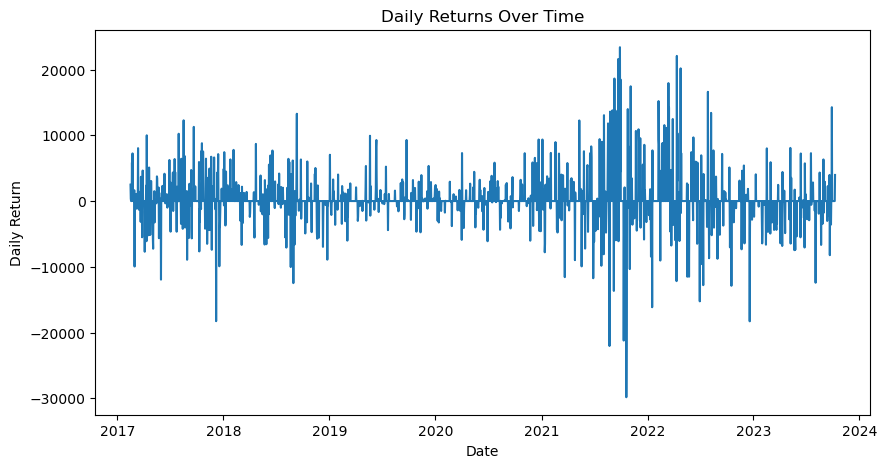

In [281]:
signals = signals.merge(df_of_return[['Asset', 'Open_Time', 'Return']], on=['Asset', 'Open_Time'], how='left')

signals['Return'].sum()
print(daily_return)

plt.figure(figsize=(10, 5))
plt.plot(daily_return.index, daily_return)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

